## 4.1 多层感知机

### 4.1.1 隐藏层

### 4.1.2 激活函数

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

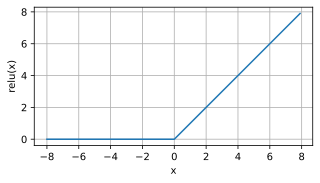

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

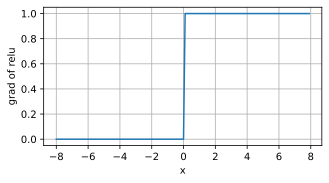

In [3]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

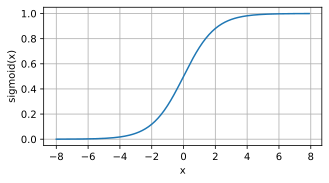

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

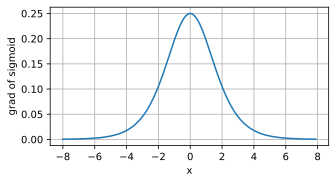

In [5]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

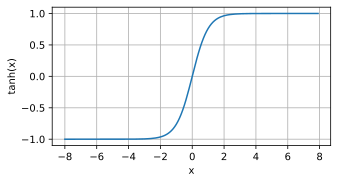

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

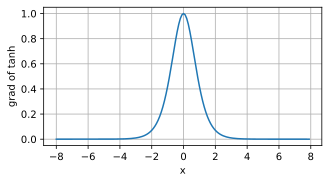

In [7]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### 练习

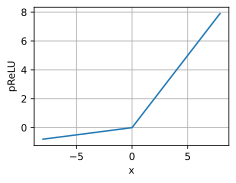

In [8]:
## 1. pReLU的导数
alpha = torch.tensor(0.1)
x = torch.arange(-8, 8, 0.1, requires_grad=True)
y = torch.prelu(x, alpha)
d2l.plot(x.detach(), y.detach(), 'x', 'pReLU')

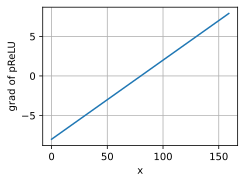

In [9]:
d2l.plot(x.detach(), x.grad, 'x', 'grad of pReLU')

## 4.2 MLP从0开始实现

In [10]:
import torch
from torch import nn
from d2l import torch as d2l

In [17]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 4.2.1 初始化模型参数

In [12]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

### 4.2.2 激活函数

In [13]:
def relu(X):
  a = torch.zeros_like(X)
  return torch.max(X, a)

### 4.2.3 模型

In [14]:
def net(X):
  X = X.reshape((-1, num_inputs))
  H = relu(X@W1 + b1)
  return (H@W2 + b2)

### 4.2.4 损失函数

In [15]:
loss = nn.CrossEntropyLoss(reduction='none')

### 4.2.5 训练

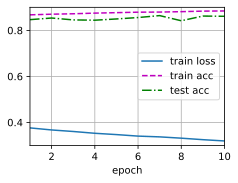

In [20]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

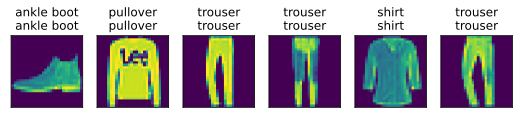

In [21]:
d2l.predict_ch3(net, test_iter)

## 4.3 多层感知机的简洁实现

In [22]:
import torch
from torch import nn
from d2l import torch as d2l

### 4.3.1 模型

In [23]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [24]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

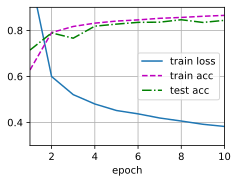

In [25]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 4.4 模型选择，欠拟合和过拟合

### 4.4.4 多项式回归

In [26]:
import math
import numpy as np
import torch 
from torch import nn
from d2l import torch as d2l

In [72]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))

for i in range(max_degree):
  poly_features[:, i] /= math.gamma(i + 1)

labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [74]:
true_w, features, poly_features, labels = [
  torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]

In [75]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.4859],
         [ 1.0192]]),
 tensor([[ 1.0000e+00, -4.8588e-01,  1.1804e-01, -1.9118e-02,  2.3222e-03,
          -2.2566e-04,  1.8274e-05, -1.2684e-06,  7.7038e-08, -4.1590e-09,
           2.0208e-10, -8.9260e-12,  3.6141e-13, -1.3508e-14,  4.6880e-16,
          -1.5185e-17,  4.6114e-19, -1.3180e-20,  3.5577e-22, -9.0979e-24],
         [ 1.0000e+00,  1.0192e+00,  5.1936e-01,  1.7644e-01,  4.4957e-02,
           9.1638e-03,  1.5566e-03,  2.2664e-04,  2.8873e-05,  3.2696e-06,
           3.3323e-07,  3.0875e-08,  2.6223e-09,  2.0558e-10,  1.4966e-11,
           1.0169e-12,  6.4774e-14,  3.8833e-15,  2.1988e-16,  1.1794e-17]]),
 tensor([3.8659, 5.2978]))

In [76]:
def evaluate_loss(net, data_iter, loss): #@save
  metric = d2l.Accumulator(2)
  for X, y in data_iter:
    out = net(X)
    y = y.reshape(out.shape)
    l = loss(out, y)
    metric.add(l.sum(), l.numel())
  return metric[0] / metric[1]

In [82]:
def train(train_features, test_features, train_labels, test_labels, num_epochs=400):
  
  loss = nn.MSELoss(reduction='none')
  input_shape = train_features.shape[-1]
  net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
  batch_size = min(10, train_labels.shape[0])

  train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)), batch_size)
  test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)), batch_size, is_train=False)

  trainer = torch.optim.SGD(net.parameters(), lr=0.01)

  animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                          xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                          legend=['train', 'test'])
  
  for epoch in range(num_epochs):
    d2l.train_epoch_ch3(net, train_iter, loss, trainer)
    if epoch == 0 or (epoch + 1) % 20 == 0:
      animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                               evaluate_loss(net, test_iter, loss)))

  print('weight: ', net[0].weight.data.numpy())


weight:  [[ 5.0007887  1.1831815 -3.3958266  5.6229506]]


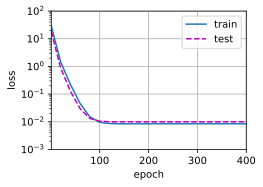

In [83]:
# 3阶 - 正常

train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

weight:  [[ 4.446327  4.484044 -1.901135]]


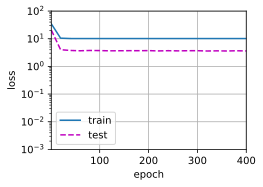

In [85]:
# 2阶 欠拟合

# 3阶 - 正常

train(poly_features[:n_train, :3], poly_features[n_train:, :3],
      labels[:n_train], labels[n_train:])

weight:  [[ 4.958727    1.4024388  -3.1916475   4.7522407  -0.40275535  1.6414583
  -0.10038534  0.10298093  0.01743999  0.13187285 -0.04010441 -0.0905015
   0.0437792  -0.0639245   0.25023502]]


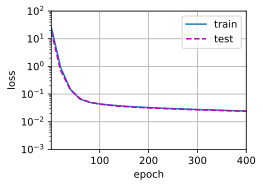

In [90]:
# 高阶 过拟合

train(poly_features[:n_train, :15], poly_features[n_train:, :15],
      labels[:n_train], labels[n_train:])

## 4.5 权重衰减

### 4.5.1 高维线性回归

In [91]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [92]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

### 4.5.2 从0开始实现

In [93]:
def init_params():
  w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
  b = torch.zeros(1, requires_grad=True)
  return [w, b]

In [94]:
def l2_penalty(w):
  return torch.sum(w.pow(2)) / 2

In [96]:
def train(lambd):
  w, b = init_params()
  net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
  num_epochs, lr = 100, 0.03
  animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', 
                          xlim=[5, num_epochs], legend=['train', 'test'])

  for epoch in range(num_epochs):
    for X, y in train_iter:
      l = loss(net(X), y) + lambd * l2_penalty(w)
      l.sum().backward()
      d2l.sgd([w, b], lr, batch_size)
    if (epoch + 1) % 5 == 0:
      animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                               d2l.evaluate_loss(net, test_iter, loss)))
  
  print('w的L2范数是', torch.norm(w).item())

w的L2范数是 12.946325302124023


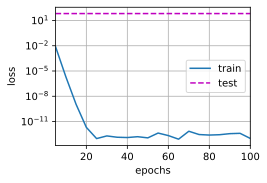

In [97]:
# 出现严重的过拟合

train(lambd=0)

w的L2范数是 0.03202824667096138


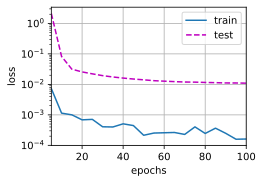

In [98]:
# 使用了权重衰减

train(lambd=3)

### 4.5.3 简洁实现

In [111]:
def train_concise(wd):
  net = nn.Sequential(nn.Linear(num_inputs, 1))
  for param in net.parameters():
    param.data.normal_()

  loss = nn.MSELoss(reduction='none')
  num_epochs, lr = 100, 0.003

  trainer = torch.optim.SGD([
    {"params": net[0].weight, 'weight_decay': wd},
    {"params": net[0].bias}], lr=lr)
  
  animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', 
                        xlim=[5, num_epochs], legend=['train', 'test'])
  
  for epoch in range(num_epochs):
    for X, y in train_iter:
      trainer.zero_grad()
      l = loss(net(X), y)
      l.mean().backward()
      trainer.step()

    if (epoch + 1) % 5 == 0:
      animator.add(epoch + 1, 
                              (d2l.evaluate_loss(net, train_iter, loss),
                               d2l.evaluate_loss(net, test_iter, loss)))
  
  print('w的L2范数是', net[0].weight.norm().item())

w的L2范数是 14.328439712524414


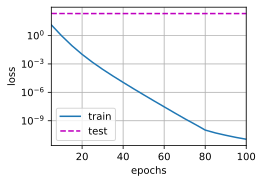

In [112]:
train_concise(0)

w的L2范数是 0.5423998832702637


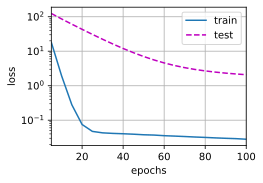

In [113]:
train_concise(3)

## 4.6 暂退法 Dropout

### 4.6.4 从0开始实现

In [1]:
import torch
from torch import nn 
from d2l import torch as d2l

In [3]:
def dropout_layer(X, dropout):
  assert 0 <= dropout <= 1
  if dropout == 1:
    return torch.zeros_like(X)
  if dropout == 0:
    return X
  
  mask = (torch.rand(X.shape) > dropout).float()
  return mask * X / (1.0 - dropout)

In [4]:
X = torch.arange(16, dtype=torch.float32).reshape((2,8))
print(X)
print(dropout_layer(X, 0))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  0.,  0.,  0.,  0.,  0., 14.],
        [16., 18., 20., 22.,  0.,  0.,  0.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [5]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [7]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
  def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
               is_training=True):
    super(Net, self).__init__()
    
    self.num_inputs = num_inputs
    self.training = is_training
    self.lin1 = nn.Linear(num_inputs, num_hiddens1)
    self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
    self.lin3 = nn.Linear(num_hiddens2, num_outputs)
    self.relu = nn.ReLU()
  
  def forward(self, X):
    H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))

    if self.training == True:
      H1 = dropout_layer(H1, dropout1)

    H2 = self.relu(self.lin2(H1))

    if self.training == True:
      H2 = dropout_layer(H2, dropout2)

    out = self.lin3(H2)
    return out
    

In [8]:
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

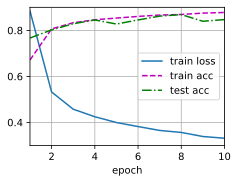

In [9]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 4.6.5 简洁实现

In [10]:
net = nn.Sequential(
  nn.Flatten(),
  nn.Linear(784, 256),
  nn.ReLU(),
  nn.Dropout(dropout1),
  nn.Linear(256, 256),
  nn.ReLU(),
  nn.Dropout(dropout2),
  nn.Linear(256, 10)
)

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

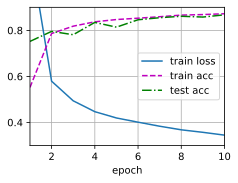

In [11]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 4.7 前向传播、反向传播和计算图

## 4.8 数值稳定性和模型初始化

### 4.8.1 梯度消失和梯度爆炸

In [12]:
%matplotlib inline
import torch
from d2l import torch as d2l

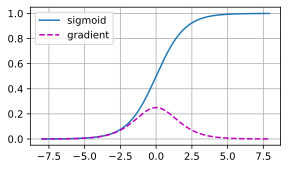

In [13]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

In [15]:
M = torch.normal(0, 1, size=(4, 4))
print('一个矩阵', M)
for i in range(100):
  M = torch.mm(M, torch.normal(0, 1, size=(4, 4)))

print('乘100个矩阵之后', M)

一个矩阵 tensor([[-0.1241,  0.0670, -0.5387,  0.1195],
        [ 1.6523, -0.0032, -0.1892,  0.7816],
        [ 1.0389,  0.0692, -1.6227,  2.1898],
        [ 0.8950, -0.5756,  1.2192,  0.1183]])
乘100个矩阵之后 tensor([[-6.4934e+23, -3.1907e+22,  1.2794e+23,  1.0153e+23],
        [-3.2252e+24, -1.5847e+23,  6.3545e+23,  5.0430e+23],
        [-6.7465e+24, -3.3150e+23,  1.3292e+24,  1.0549e+24],
        [ 4.5543e+23,  2.2378e+22, -8.9732e+22, -7.1212e+22]])


## 4.9 环境和分布偏移

## 4.10 实战Kaggle比赛：预测房价

### 4.10.1 下载和缓存数据集

In [7]:
import hashlib
import os
import tarfile
import zipfile
import requests

#@save
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

In [2]:
def download(name, cache_dir=os.path.join('data')): #@save
  assert name in DATA_HUB, f'{name} 不存在于 {DATA_HUB}'

  url, sha1_hash = DATA_HUB[name]
  os.makedirs(cache_dir, exist_ok=True)
  fname = os.path.join(cache_dir, url.split('/')[-1])

  if os.path.exists(fname):
    sha1 = hashlib.sha1()
    with open(fname, 'rb') as f:
      while True:
        data = f.read(1048579)
        if not data:
          break
        sha1.update(data)
    
    if sha1.hexdigest() == sha1_hash:
      return fname
    
  print(f'downloading {fname} from {url}')
  r = requests.get(url, stream=True, verify=True)
  
  with open(fname, 'wb') as f:
    f.write(r.content)
  
  return fname


In [3]:
def download_extract(name, folder=None):
  fname = download(fname)
  base_dir = os.path.dirname(fname)
  data_dir, ext = os.path.splitext(fname)
  if ext == '.zip':
    fp = zipfile.ZipFile(fname, 'r')
  elif ext in ('.tar', '.gz'):
    fp = tarfile.open(fname, 'r')
  else:
    assert False, 'should be tar or zip'

  fp.extractall(base_dir)
  return os.path.join(base_dir, folder) if folder else data_dir

def download_all():
  for name in DATA_HUB:
    download(name)

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch 
from torch import nn
from d2l import torch as d2l

In [8]:
DATA_HUB['kaggle_house_train'] = ( #@save
  DATA_URL + 'kaggle_house_pred_train.csv', '585e9cc93e70b39160e7921475f9bcd7d31219ce')

DATA_HUB['kaggle_house_test'] = ( #@save
  DATA_URL + 'kaggle_house_pred_test.csv', 'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')

In [9]:
train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))

downloading data\kaggle_house_pred_train.csv from http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv
downloading data\kaggle_house_pred_test.csv from http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_test.csv


In [10]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [12]:
print(train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [13]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

In [15]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index

all_features[numeric_features] = all_features[numeric_features].apply(
  lambda x: (x - x.mean()) / (x.std())
)

all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [16]:
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 331)

In [18]:
n_train = train_data.shape[0]

train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)

train_labels = torch.tensor(
  train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)

In [19]:
loss = nn.MSELoss()

in_features = train_features.shape[1]

def get_net():
  net = nn.Sequential(nn.Linear(in_features, 1))
  return net

In [21]:
def log_rmse(net, features, labels):
  clipped_preds = torch.clamp(net(features), 1, float('inf'))
  rmse = torch.sqrt(loss(torch.log(clipped_preds),
                         torch.log(labels)))
  return rmse.item() 

In [22]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
  train_ls, test_ls = [], []
  train_iter = d2l.load_array((train_features, train_labels), batch_size)

  optimizer = torch.optim.Adam(net.parameters(),
                               lr=learning_rate,
                               weight_decay=weight_decay)
  
  for epoch in range(num_epochs):
    for X, y in train_iter:
      optimizer.zero_grad()
      l = loss(net(X), y)
      l.backward()
      optimizer.step()
    train_ls.append(log_rmse(net, train_features, train_labels))
    if test_labels is not None:
      test_ls.append(log_rmse(net, test_features, test_labels))
    
  return train_ls, test_ls

In [23]:
def get_k_fold_data(k, i, X, y):
  assert k > 1
  fold_size = X.shape[0] // k
  X_train, y_train = None, None
  for j in range(k):
    idx = slice(j * fold_size, (j + 1) * fold_size)
    X_part, y_part = X[idx, :], y[idx]
    if j == i:
      X_valid, y_valid = X_part, y_part
    elif X_train is None:
      X_train, y_train = X_part, y_part
    else:
      X_train = torch.cat([X_train, X_part], 0)
      y_train = torch.cat([y_train, y_part], 0)
  return X_train, y_train, X_valid, y_valid

In [29]:
def k_fold(k, X_train, y_train, num_epochs,
          learning_rate, weight_decay,batch_size):
  train_l_sum, valid_l_sum = 0, 0
  for i in range(k):
    data = get_k_fold_data(k, i, X_train, y_train)
    net = get_net()
    train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
    weight_decay, batch_size)
    train_l_sum += train_ls[-1]
    valid_l_sum += valid_ls[-1]
    if i == 0:
      d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
               xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
               legend=['train', 'valid'], yscale='log')

    print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
          f'验证log rmse{float(valid_ls[-1]):f}')

  return train_l_sum / k, valid_l_sum / k

折1，训练log rmse0.169815, 验证log rmse0.156545
折2，训练log rmse0.162534, 验证log rmse0.189540
折3，训练log rmse0.163561, 验证log rmse0.168459
折4，训练log rmse0.167604, 验证log rmse0.154991
折5，训练log rmse0.163366, 验证log rmse0.183028
5-折验证: 平均训练log rmse: 0.165376, 平均验证log rmse: 0.170513


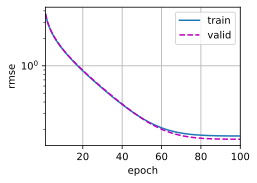

In [30]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64

train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, 
                          lr, weight_decay, batch_size)

print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

In [31]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
  net = get_net()
  train_ls, _ = train(net, train_features, train_labels, None, None,
                      num_epochs, lr, weight_decay, batch_size)

  d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
           ylabel='log rmse', xlim=[1, num_epochs], yscale='log')

  print(f'训练log rmse：{float(train_ls[-1]):f}')

  preds = net(test_features).detach().numpy()

  test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])

  submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)

  submission.to_csv('submission.csv', index=False)

训练log rmse：0.162536


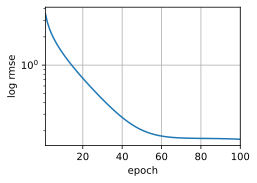

In [32]:
train_and_pred(train_features, test_features, train_labels, test_data, 
               num_epochs, lr, weight_decay, batch_size)